In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
#from GA import Genetic_Algorithm
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

data = pd.read_csv("content\\Automobile_data.csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [4]:
data.describe().sum()

symboling              211.079453
wheel-base             811.178361
length                1263.186557
width                  602.153009
height                 530.368400
curb-weight          16329.246057
engine-size           1118.550011
compression-ratio      276.114577
city-mpg               371.761654
highway-mpg            401.637663
dtype: float64

In [5]:
data.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [6]:
unique_values_by_column = {}

for column in data.columns:
    unique_values = data[column].unique()
    unique_values_sorted = sorted(unique_values)
    unique_values_by_column[column] = unique_values_sorted

    if '?' in unique_values_sorted:
        print(f"Стовпець '{column}' містить значення '?'")

# Вивід відсортованих унікальних значень для кожного стовпця
for column, unique_values in unique_values_by_column.items():
    print(f"Відсортовані унікальні значення для стовпця '{column}': {unique_values}")

Стовпець 'normalized-losses' містить значення '?'
Стовпець 'num-of-doors' містить значення '?'
Стовпець 'bore' містить значення '?'
Стовпець 'stroke' містить значення '?'
Стовпець 'horsepower' містить значення '?'
Стовпець 'peak-rpm' містить значення '?'
Стовпець 'price' містить значення '?'
Відсортовані унікальні значення для стовпця 'symboling': [-2, -1, 0, 1, 2, 3]
Відсортовані унікальні значення для стовпця 'normalized-losses': ['101', '102', '103', '104', '106', '107', '108', '110', '113', '115', '118', '119', '121', '122', '125', '128', '129', '134', '137', '142', '145', '148', '150', '153', '154', '158', '161', '164', '168', '186', '188', '192', '194', '197', '231', '256', '65', '74', '77', '78', '81', '83', '85', '87', '89', '90', '91', '93', '94', '95', '98', '?']
Відсортовані унікальні значення для стовпця 'make': ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 

In [7]:
data_changed=data[data['price'] !='?']
data_changed['price']= pd.to_numeric(data_changed["price"])

data_changed['peak-rpm']= pd.to_numeric(data_changed["peak-rpm"].apply(lambda x:"0" if x=='?' else x))
data_changed['horsepower']= pd.to_numeric(data_changed["horsepower"].apply(lambda x:"0" if x=='?' else x))
data_changed['normalized-losses']= pd.to_numeric(data_changed["normalized-losses"].apply(lambda x:"0" if x=='?' else x))
data_changed['bore']= pd.to_numeric(data_changed["bore"].apply(lambda x:"0" if x=='?' else x))
data_changed['stroke']= pd.to_numeric(data_changed["stroke"].apply(lambda x:"0" if x=='?' else x))

data_changed['num-of-doors'] = data_changed['num-of-doors'].replace('?', 'unknown')

numeric_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data_changed

C:\Users\admin\AppData\Local\Temp\ipykernel_28324\2792020015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_changed['price']= pd.to_numeric(data_changed["price"])
C:\Users\admin\AppData\Local\Temp\ipykernel_28324\2792020015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_changed['peak-rpm']= pd.to_numeric(data_changed["peak-rpm"].apply(lambda x:"0" if x=='?' else x))
C:\Users\admin\AppData\Local\Temp\ipykernel_28324\2792020015.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


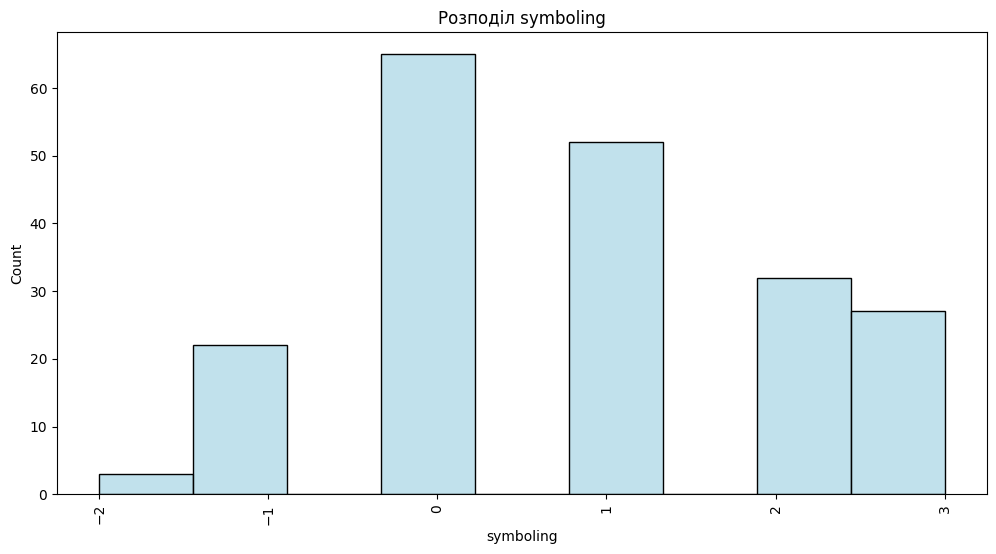

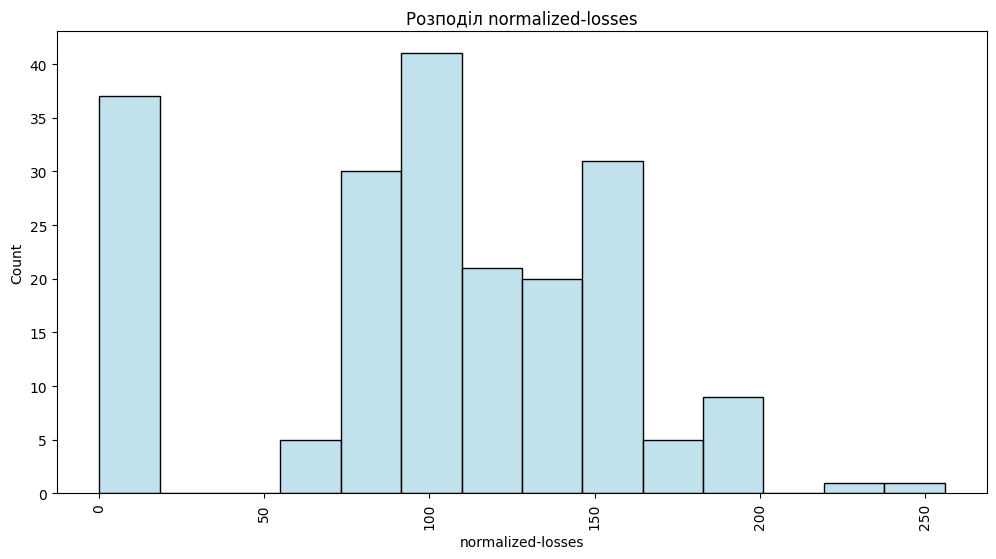

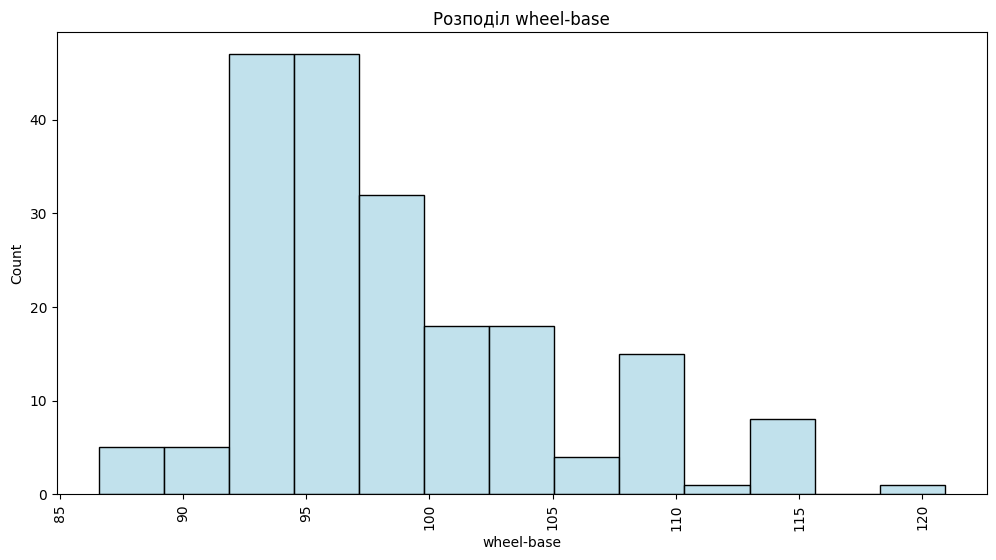

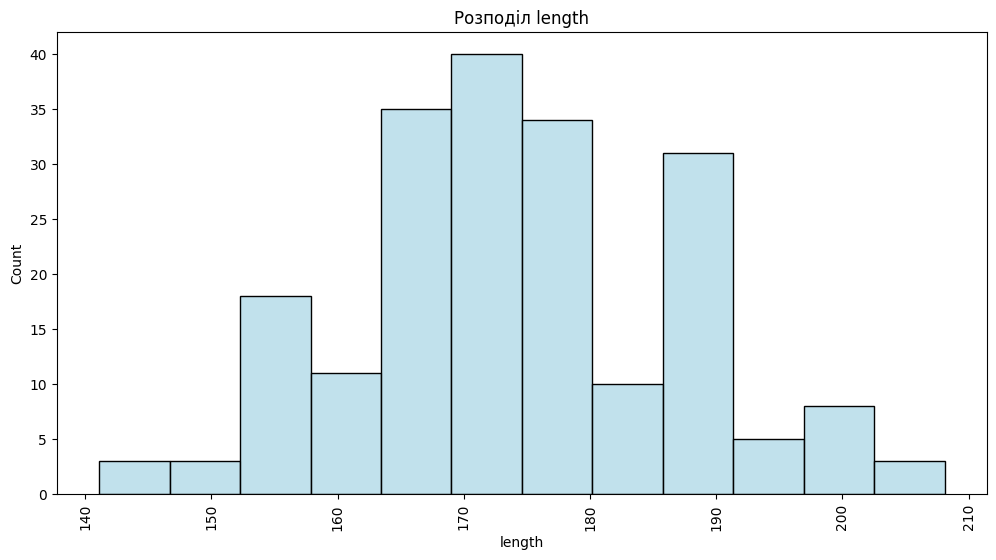

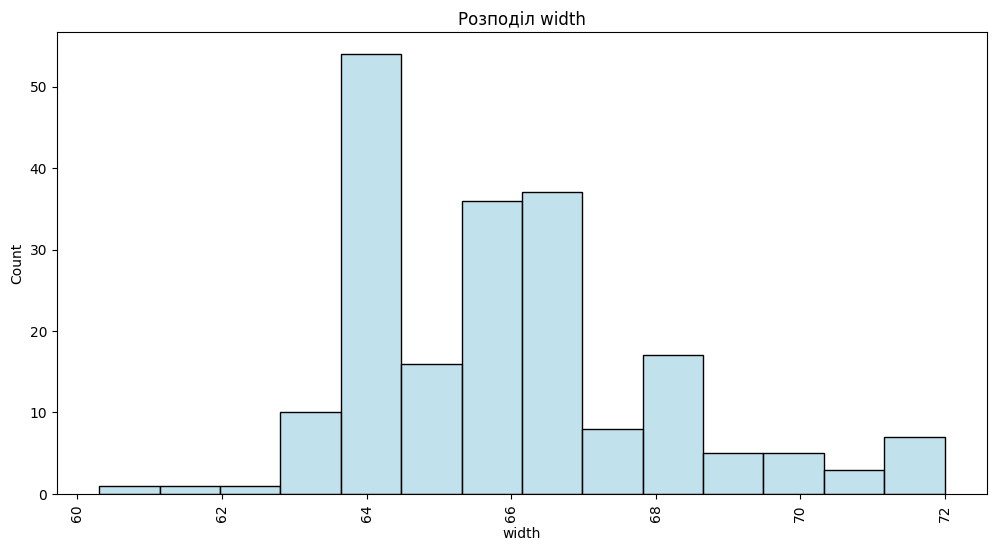

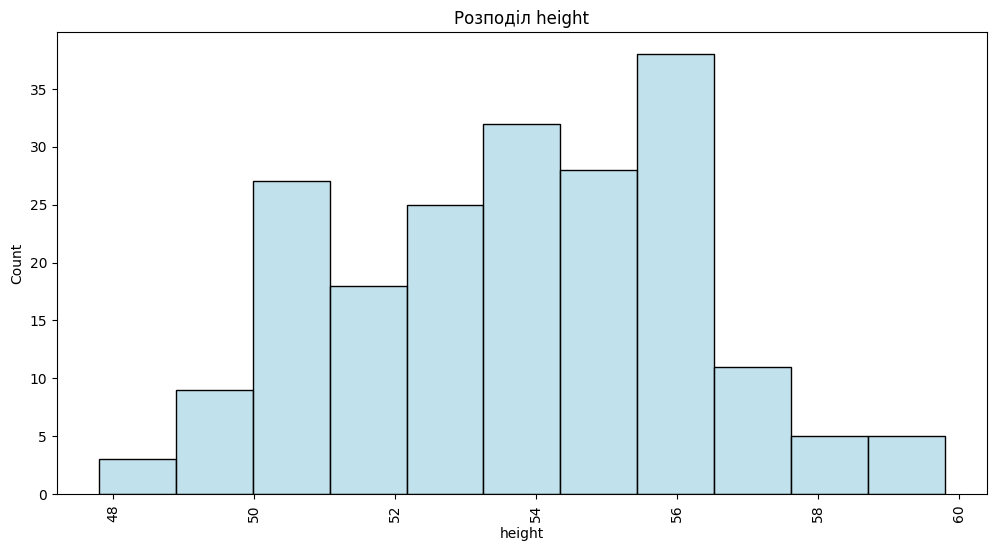

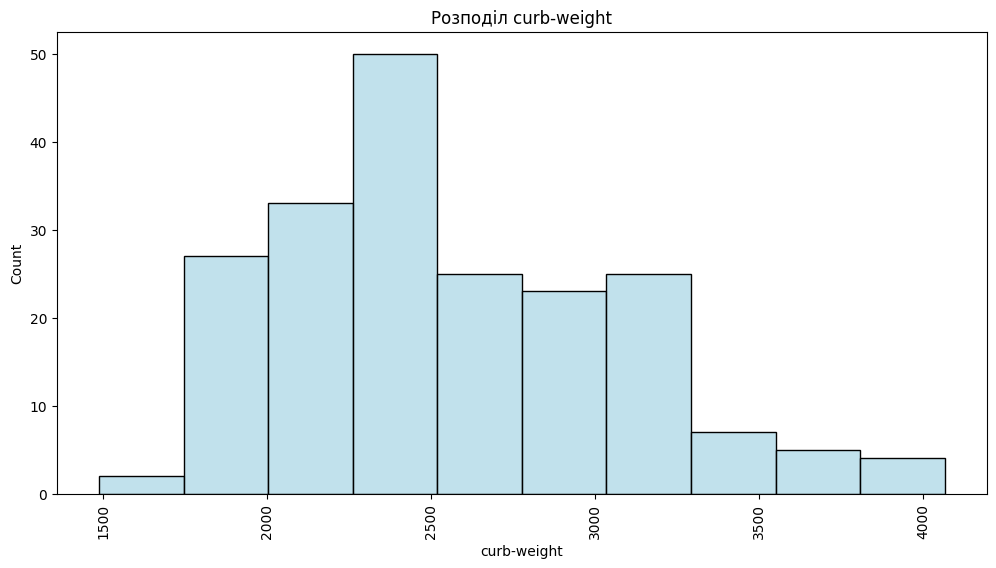

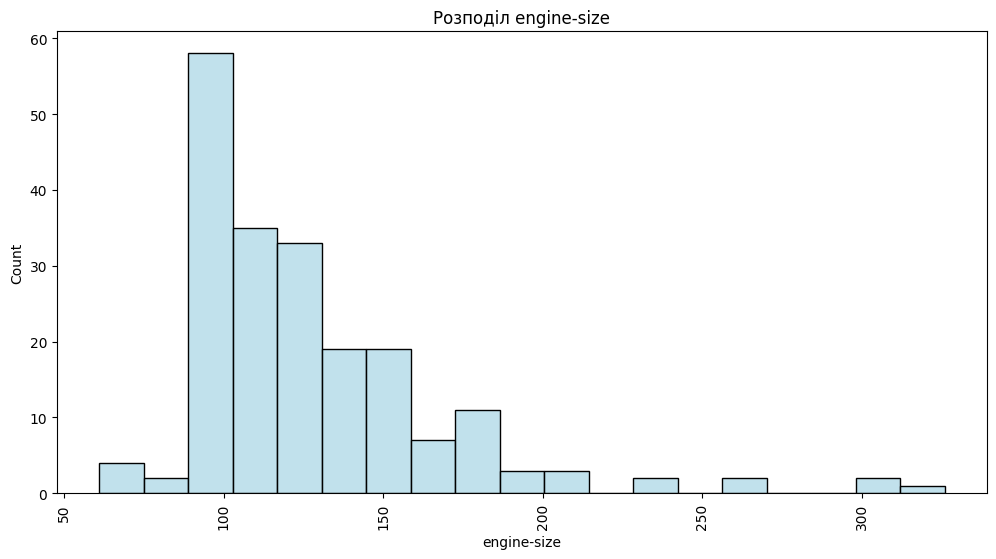

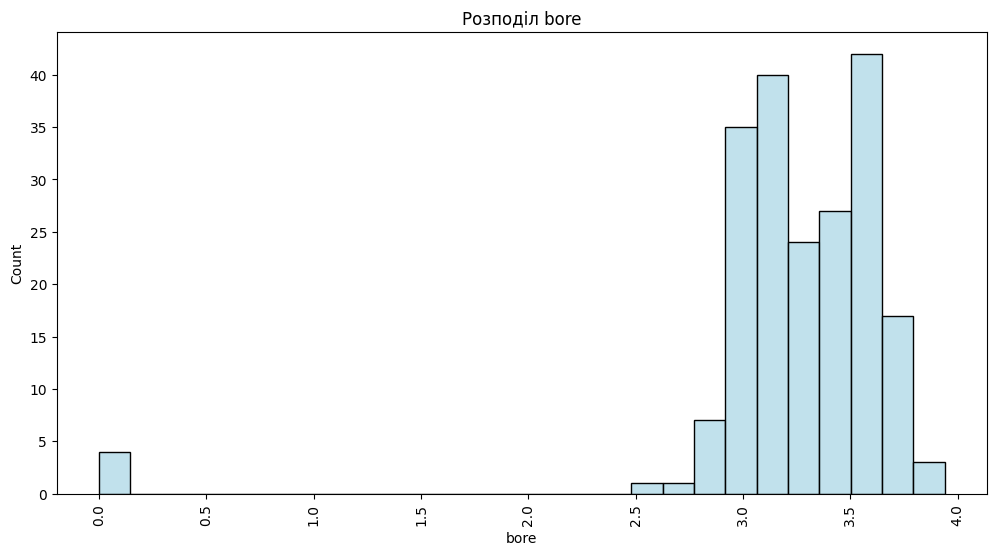

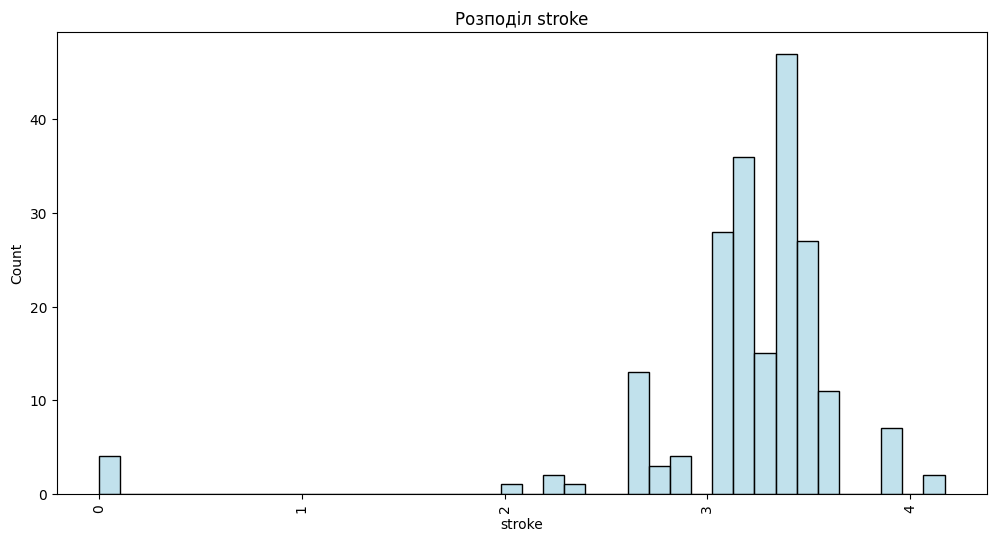

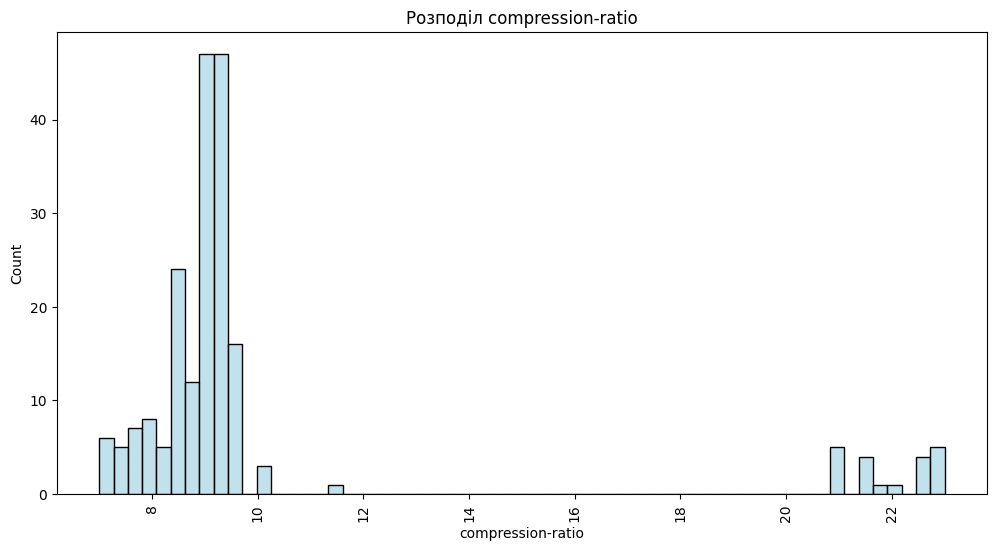

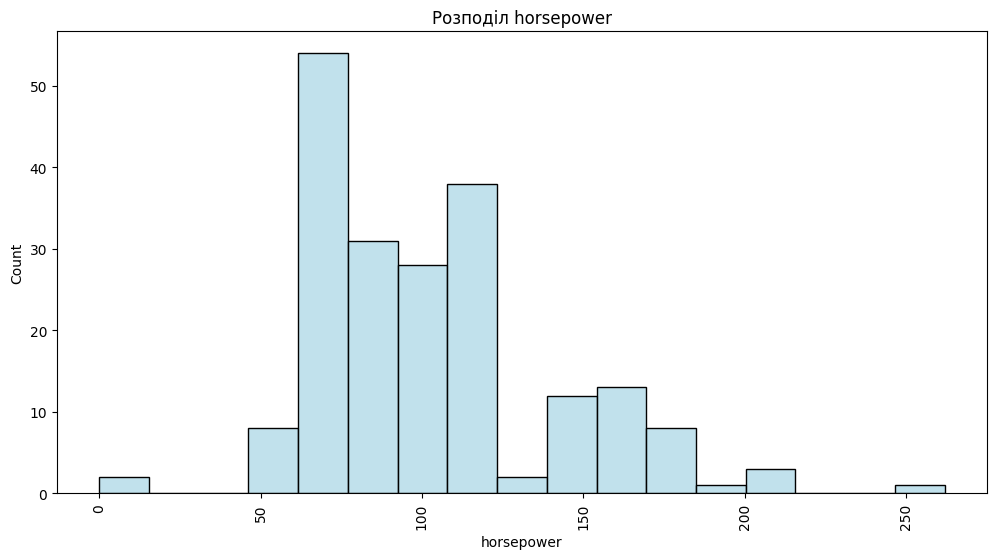

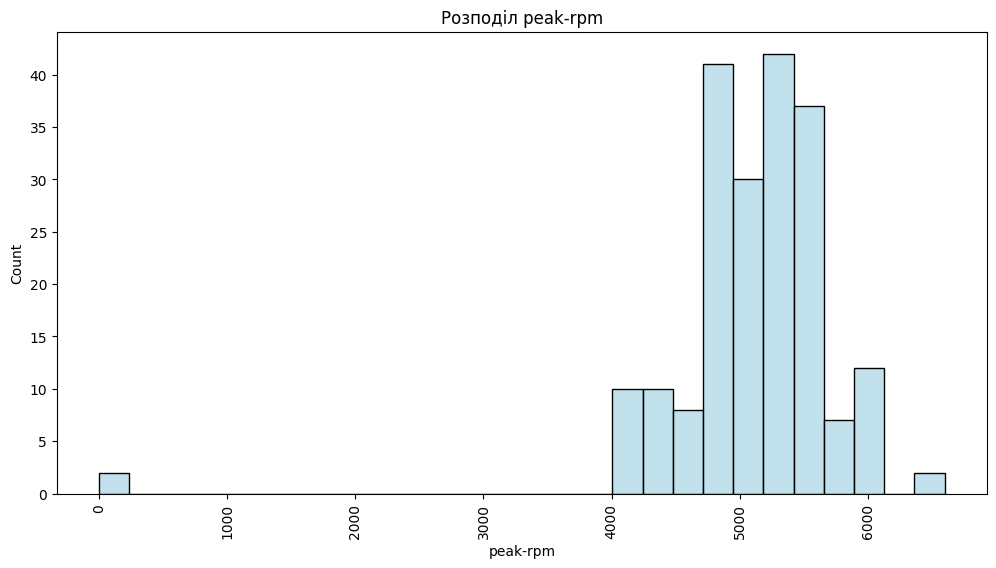

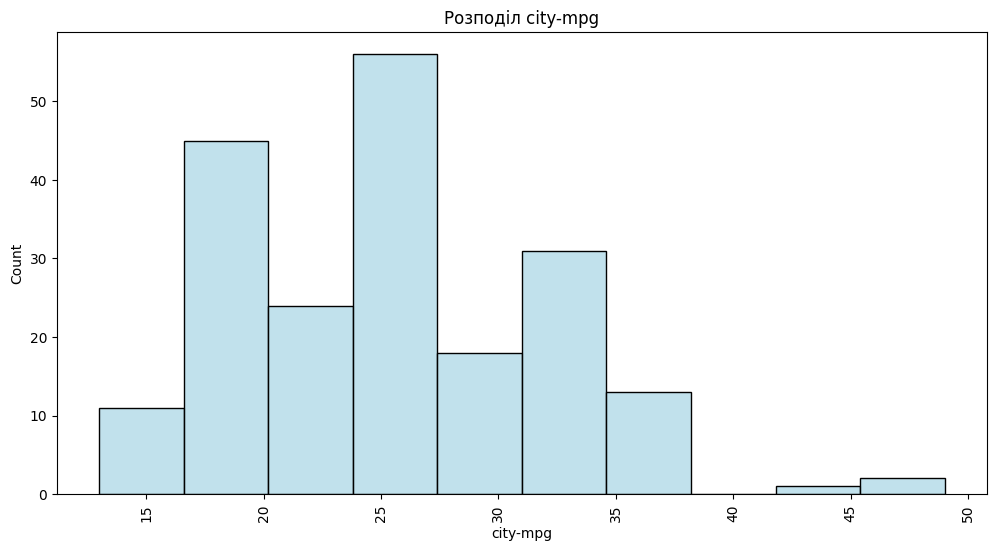

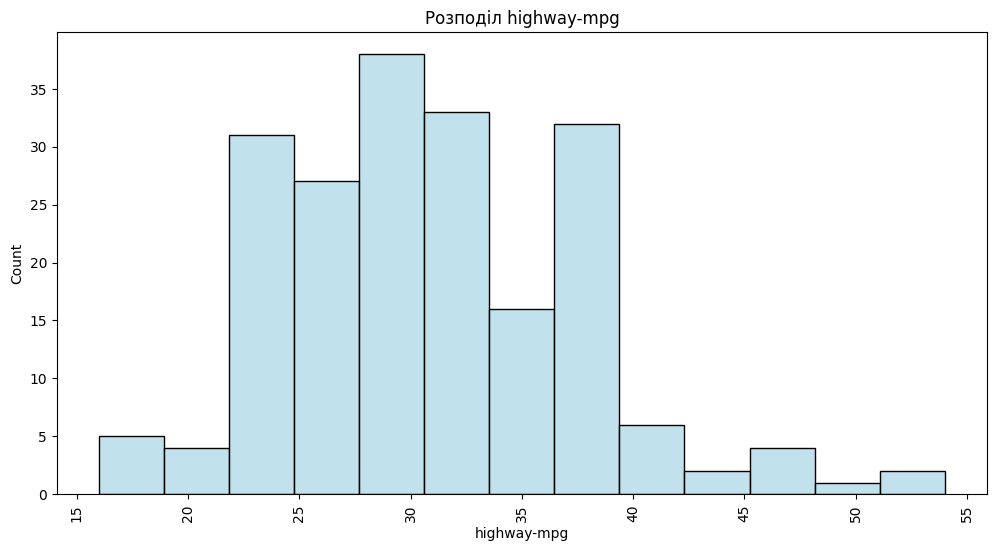

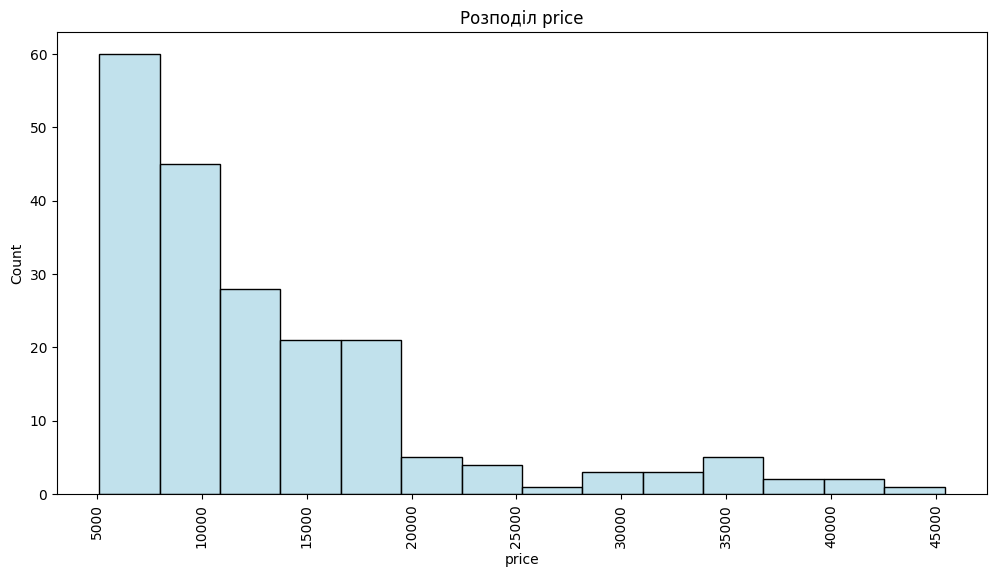

In [8]:
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(x=column, data=data_changed, color="lightblue")
    plt.title(f'Розподіл {column}')
    plt.xticks(rotation=90)

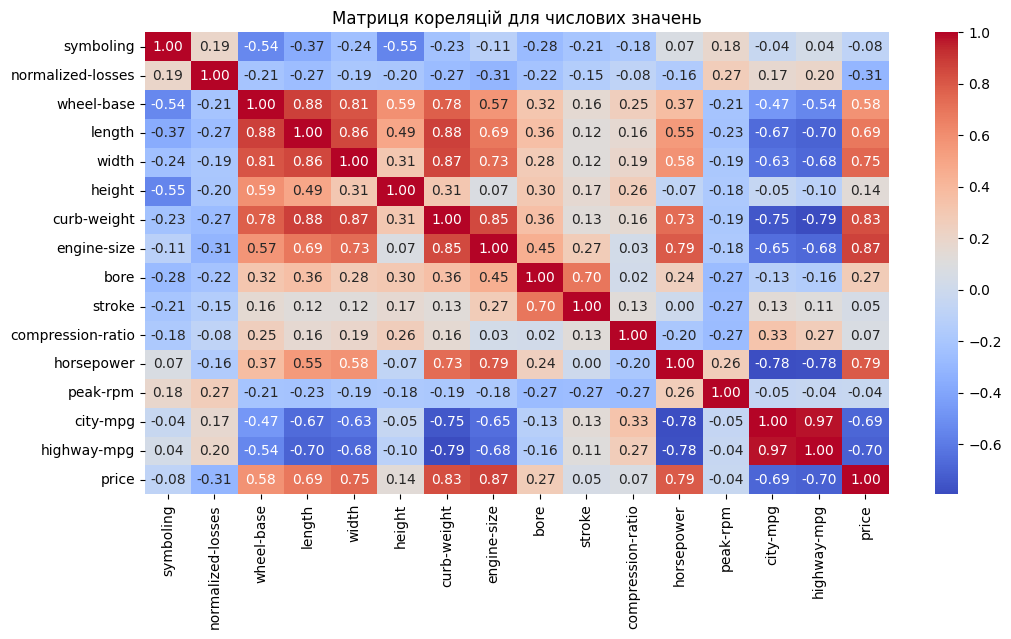

In [9]:
correlation_matrix = data_changed[numeric_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матриця кореляцій для числових значень')
plt.show()

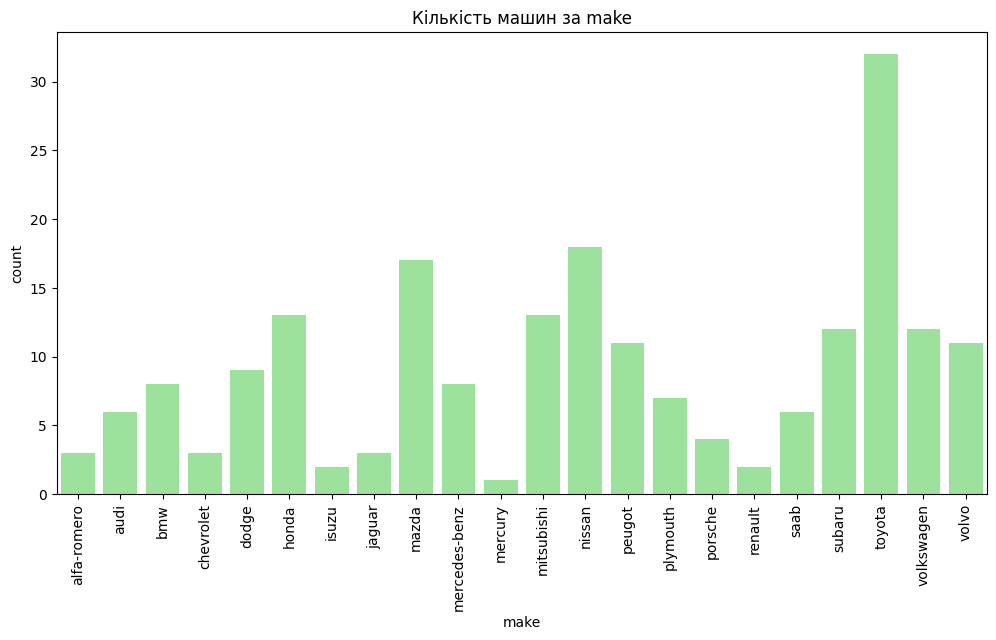

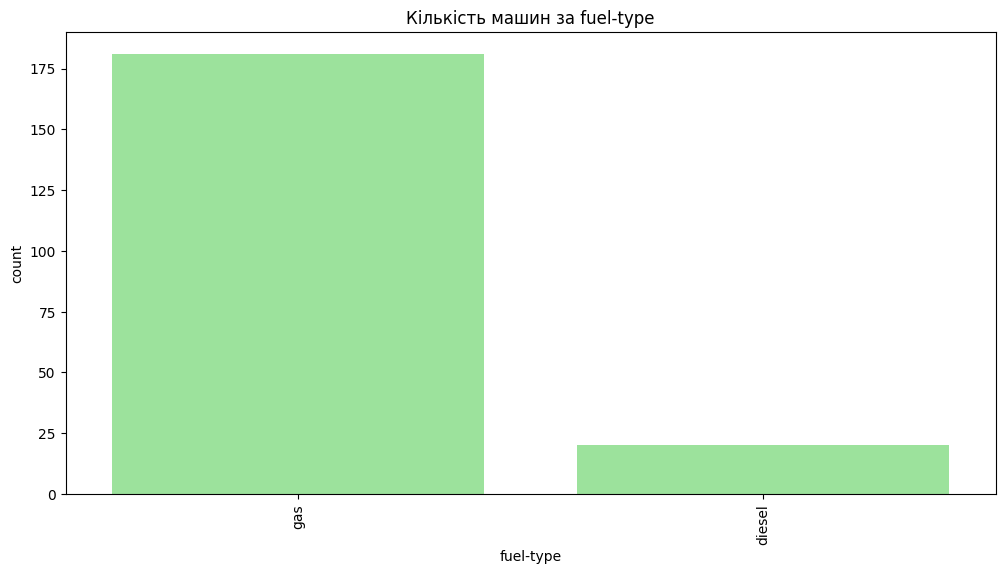

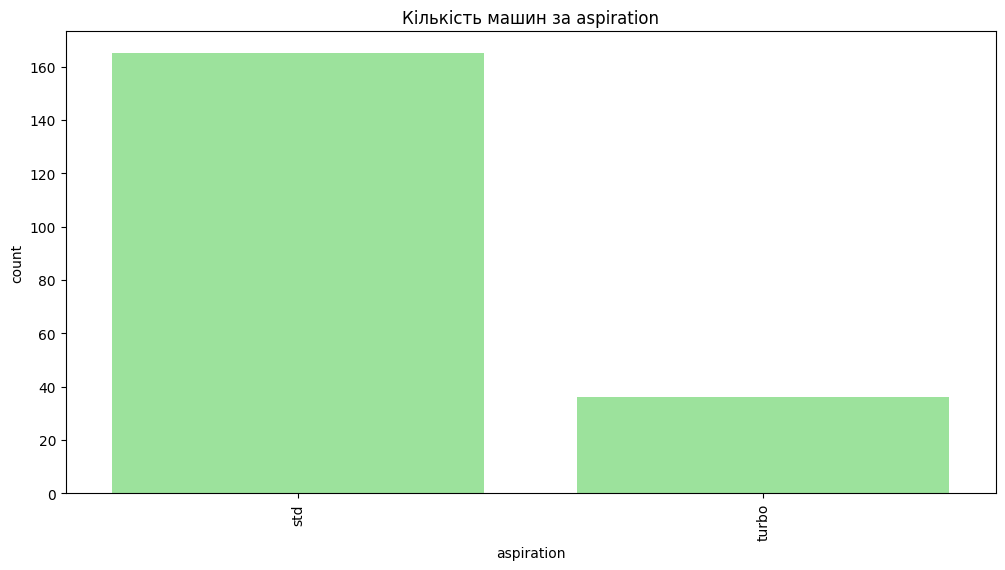

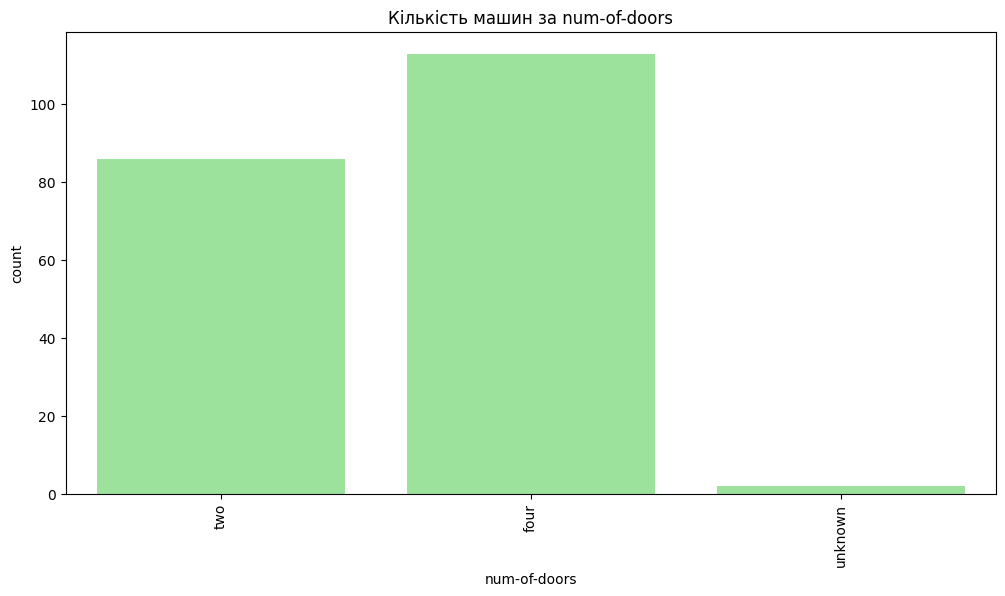

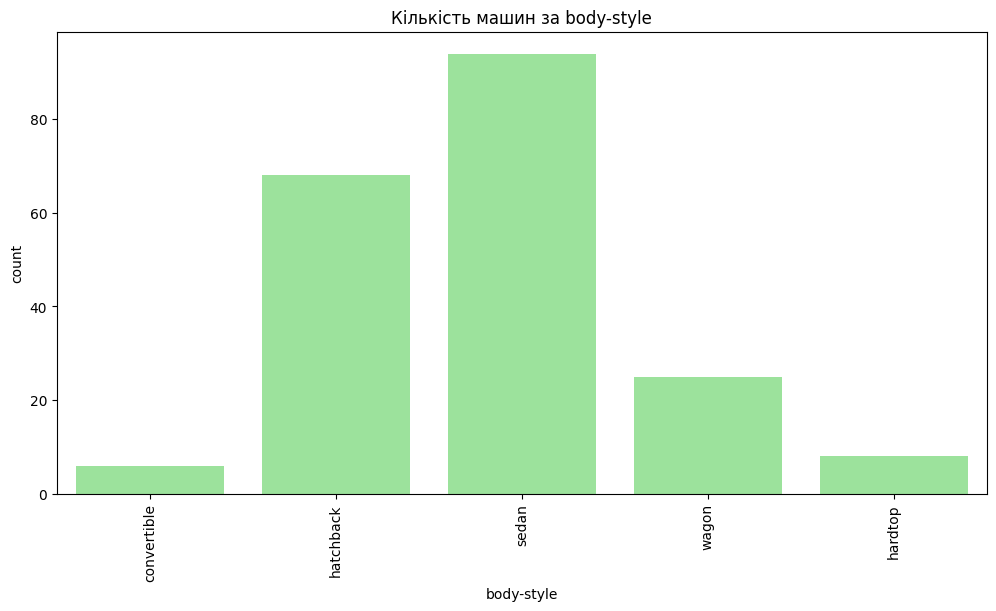

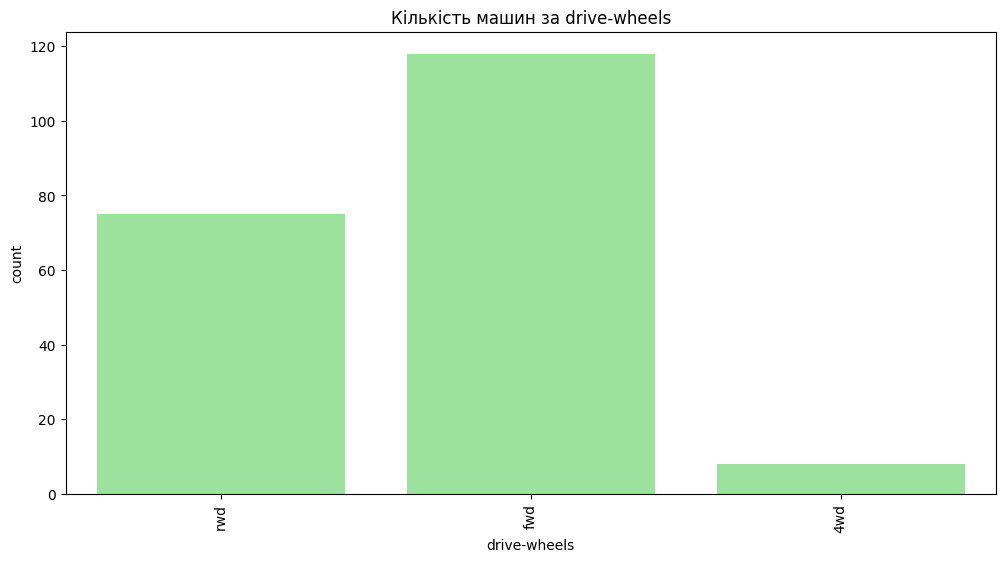

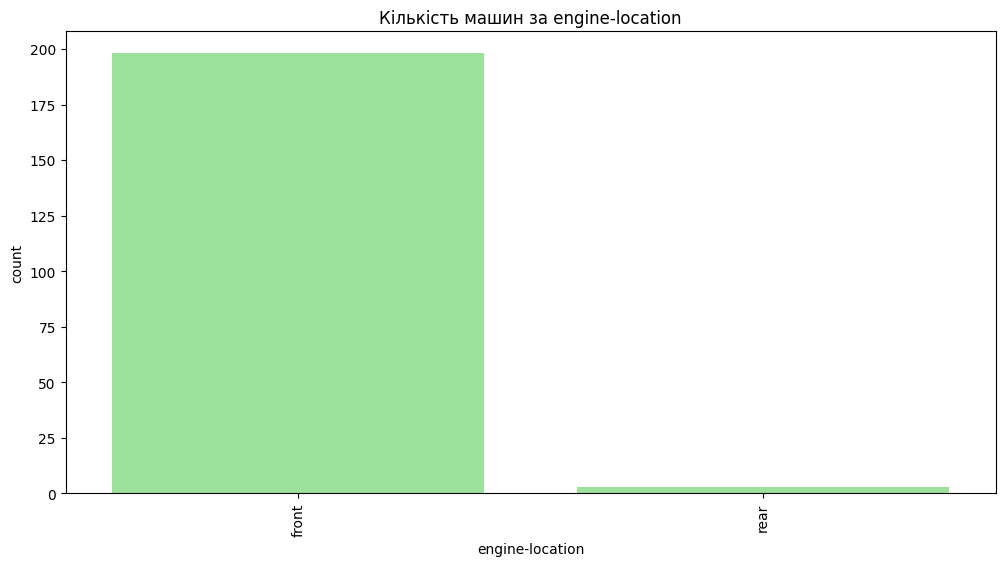

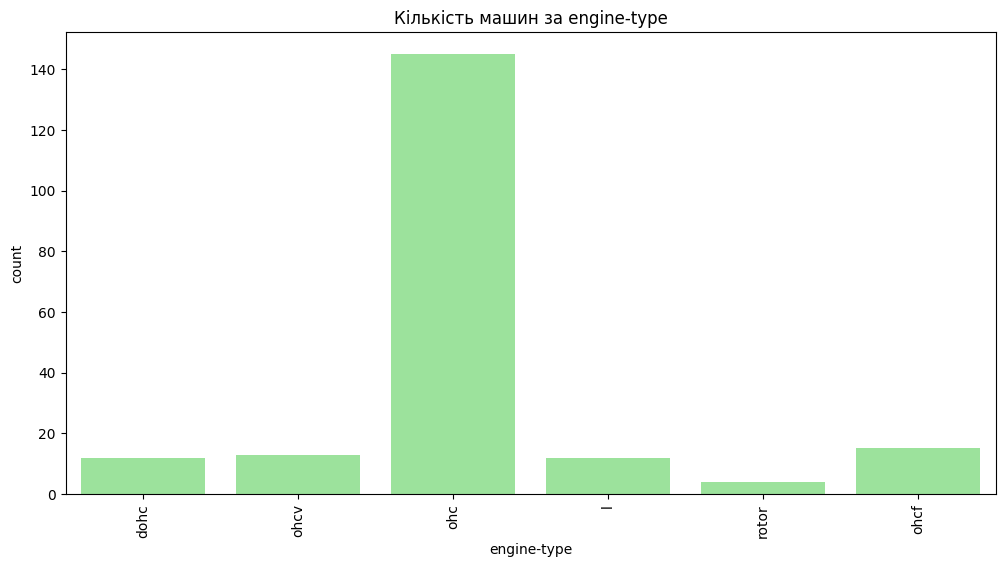

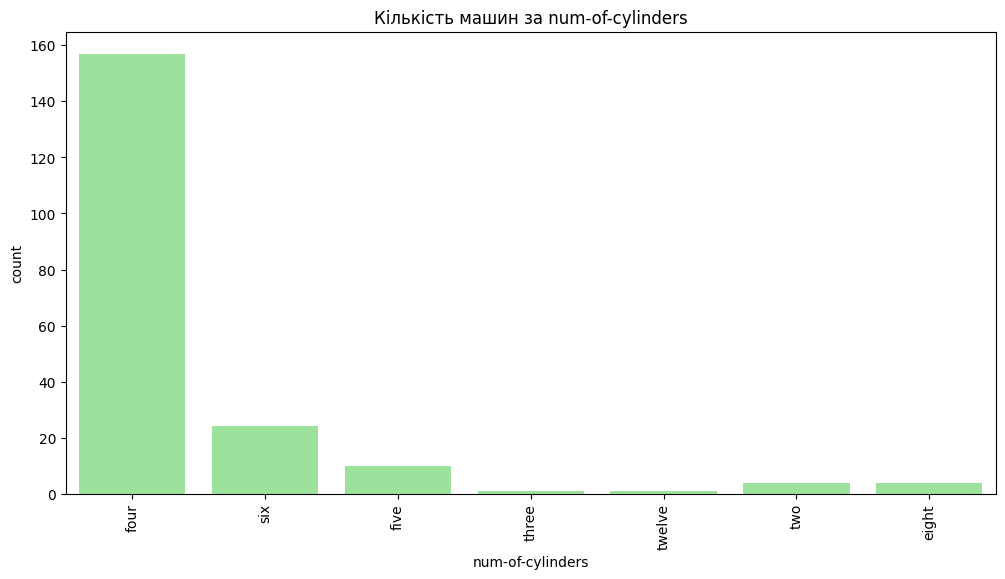

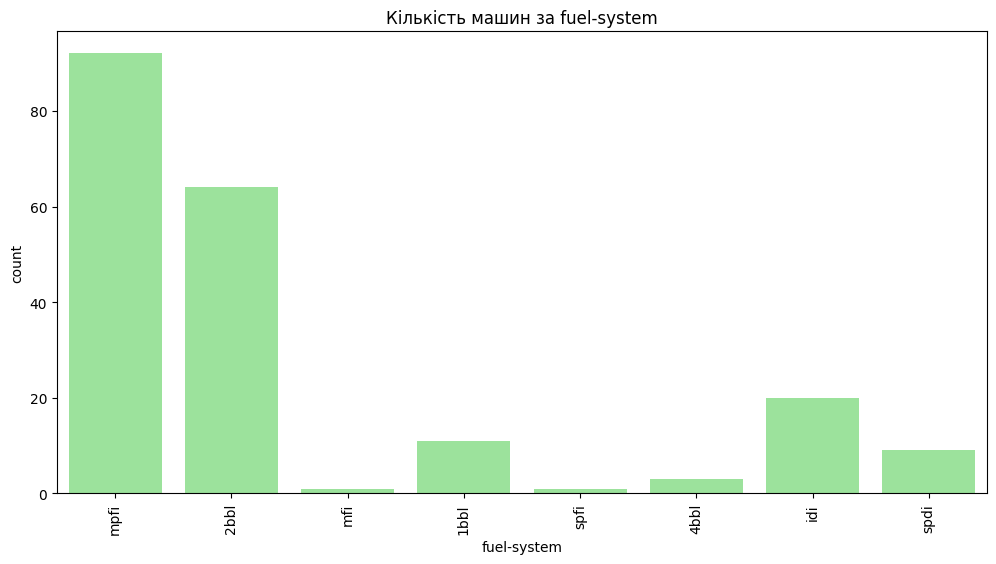

In [10]:
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data_changed, color="lightgreen")
    plt.title(f'Кількість машин за {column}')
    plt.xticks(rotation=90)

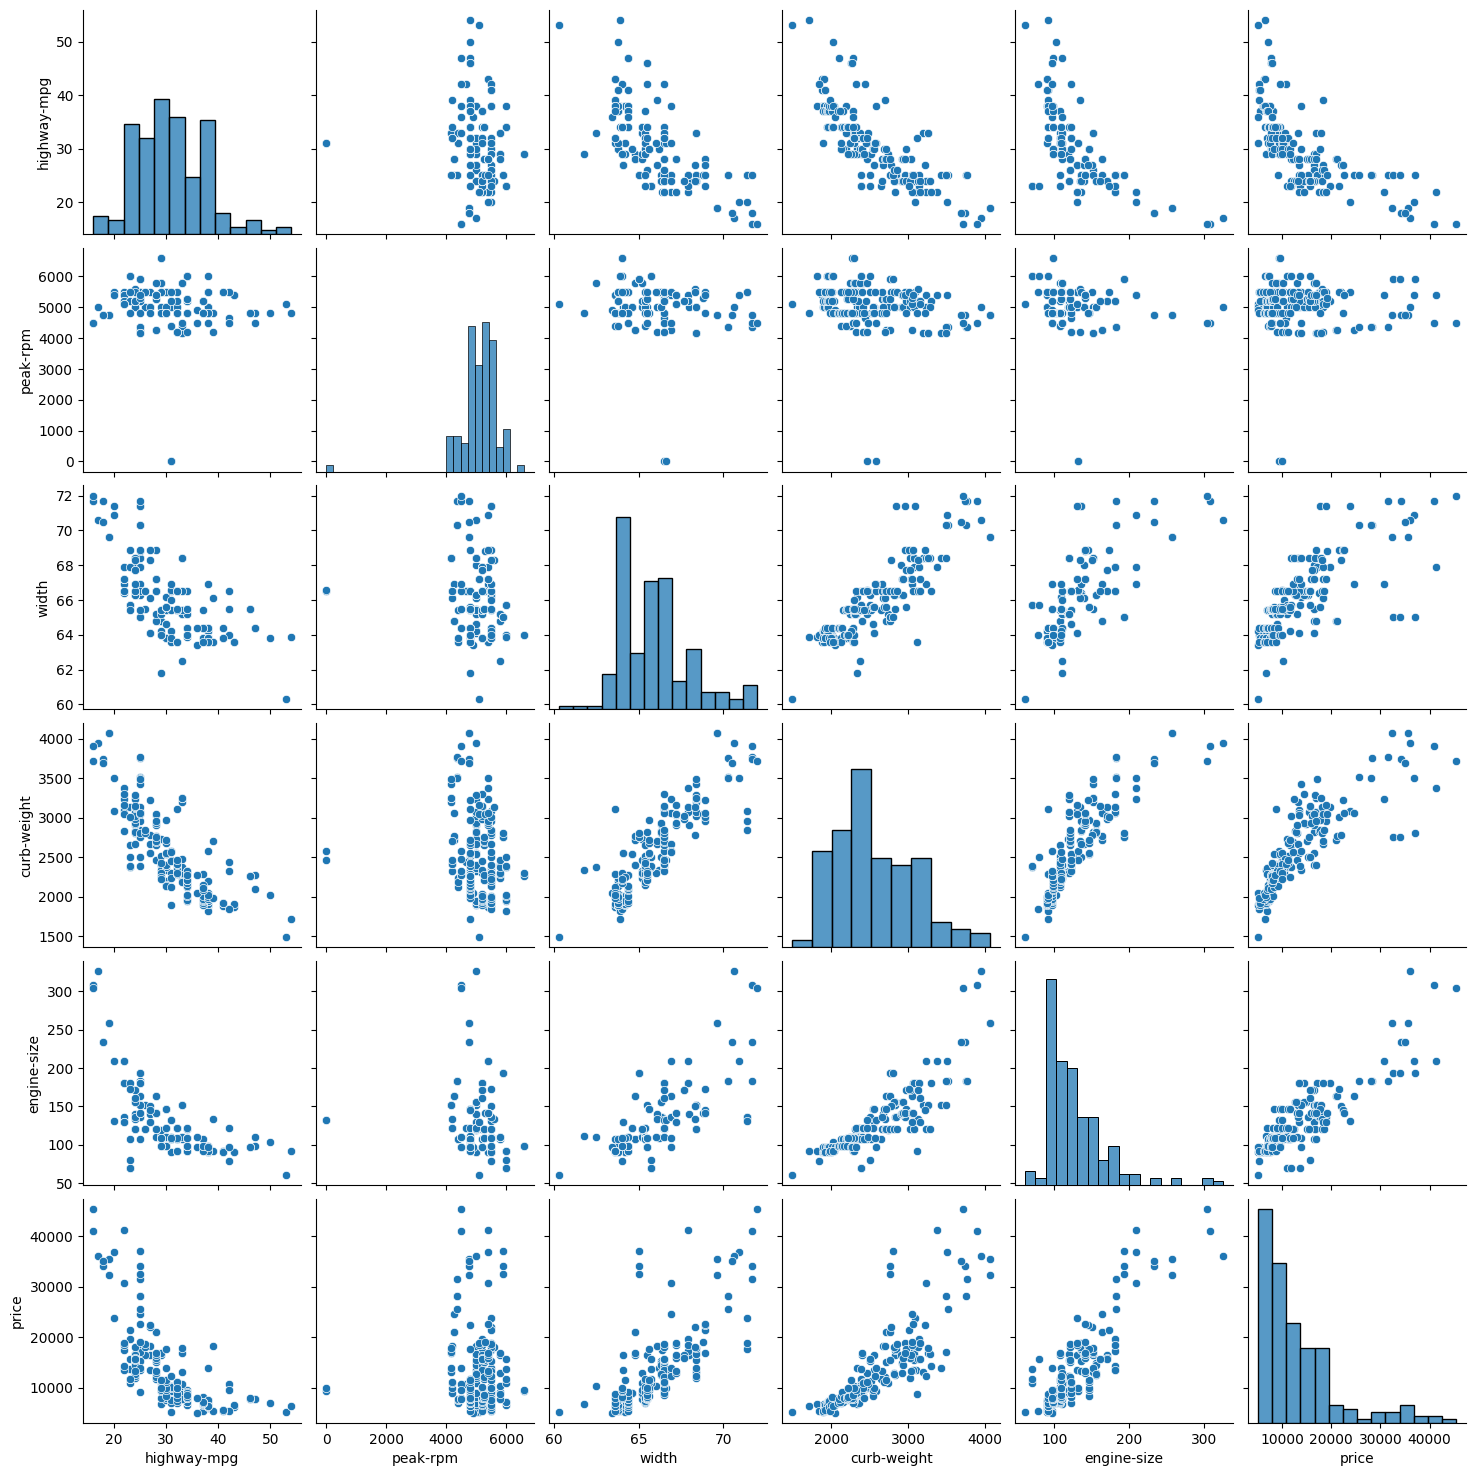

<Figure size 1200x600 with 0 Axes>

In [14]:
part_numeric_columns = ['highway-mpg', 'peak-rpm', 'width', 'curb-weight', 'engine-size', 'price']
sns.pairplot(data_changed[part_numeric_columns])
plt.figure(figsize=(12, 6))
plt.show()

In [15]:
numeric_columns

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [18]:
new_numeric_features = data_changed.select_dtypes(include=['float64', 'int64'])
target = new_numeric_features['price']
features = new_numeric_features.drop('price', axis=1)

selectorVariance = VarianceThreshold()
selectorVariance.fit(features)

random_forest_model = RandomForestRegressor()
random_forest_model.fit(features, target)
feature_importances = random_forest_model.feature_importances_

def udf_pearsonr(X, y):
    result = np.array([pearsonr(x, y) for x in X.T]) # list of (pearsonr, p-value)
    return np.absolute(result[:,0]), result[:,1] 

selectorPearson = SelectKBest(udf_pearsonr, k='all')
selectorPearson.fit(features, target) 

#selectorFscore = SelectKBest(f_classif, k='all')
#selectorFscore.fit_transform(features, target)

#selectorMutual = SelectKBest(mutual_info_classif, k='all')
#selectorMutual.fit(features, target)

SelectKBest(k='all', score_func=<function udf_pearsonr at 0x0000026514A71670>)

In [19]:
ranked_data_pearsoncorrelation = pd.DataFrame(index=features.columns)
ranked_data_pearsoncorrelation['PearsonCorrelation'] = selectorPearson.scores_
ranked_data_pearsoncorrelation

,PearsonCorrelation
symboling,0.082391
normalized-losses,0.308176
wheel-base,0.584642
length,0.690628
width,0.751265
height,0.135486
curb-weight,0.834415
engine-size,0.872335
bore,0.273614
stroke,0.049628


In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(ranked_data_pearsoncorrelation[['PearsonCorrelation']], annot=True, fmt=".3f", cmap='plasma', yticklabels=ranked_data_pearsoncorrelation['index'])
plt.title('PearsonCorrelation')
plt.ylabel('Features')
plt.show()

KeyError: 'index'

<Figure size 1200x600 with 0 Axes>

In [23]:
ranked_data_randomforest = random_forest_model.feature_importances_
randomforest_data = pd.DataFrame({'Features': features.columns, 'Importance': ranked_data_randomforest})
randomforest_data = randomforest_data.sort_values(by='Importance', ascending=False)
randomforest_data

,Features,Importance
7,engine-size,0.649760
6,curb-weight,0.209134
14,highway-mpg,0.042942
11,horsepower,0.021966
4,width,0.013124
3,length,0.009449
2,wheel-base,0.008063
1,normalized-losses,0.007995
10,compression-ratio,0.007223
5,height,0.006663


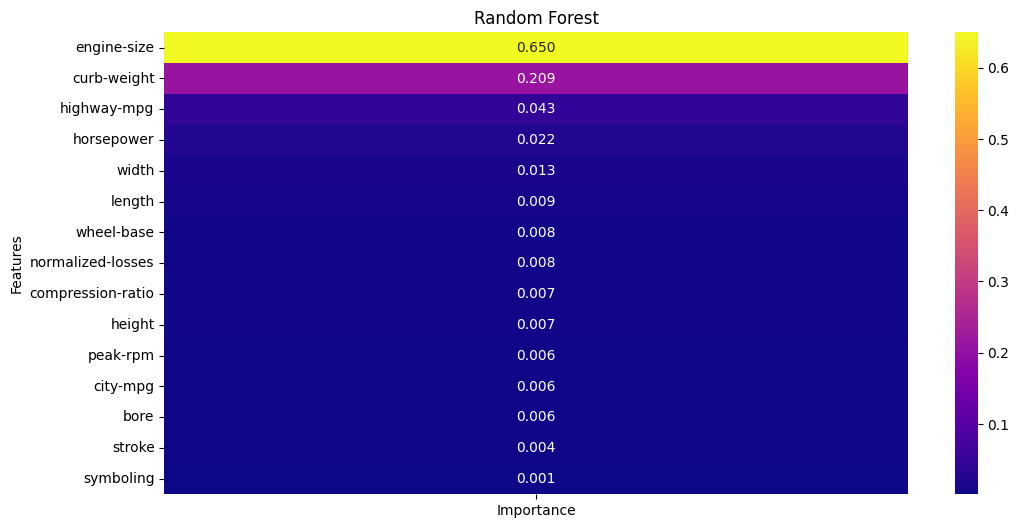

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(randomforest_data[['Importance']], annot=True, fmt=".3f", cmap='plasma', yticklabels=randomforest_data['Features'])
plt.title('Random Forest')
plt.ylabel('Features')
plt.show()

In [25]:
ranked_data_variancethreshold = pd.DataFrame(index=features.columns)
ranked_data_variancethreshold['VarianceThreshold'] = selectorVariance.variances_
ranked_data_variancethreshold

,VarianceThreshold
symboling,1.566694
normalized-losses,256.000000
wheel-base,34.300000
length,67.000000
width,4.394209
height,5.962023
curb-weight,2578.000000
engine-size,265.000000
bore,0.287880
stroke,0.306281


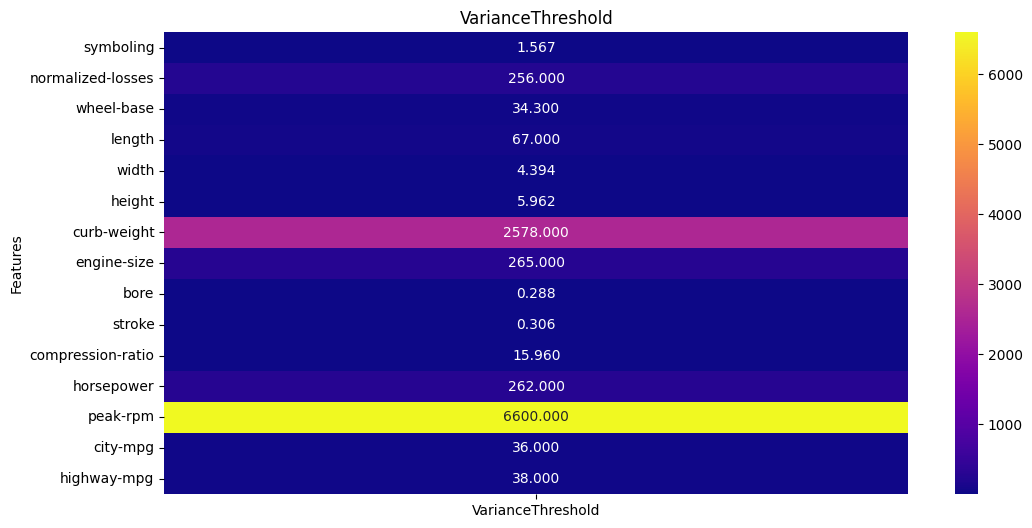

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(ranked_data_variancethreshold[['VarianceThreshold']], annot=True, fmt=".3f", cmap='plasma', yticklabels=ranked_data_variancethreshold.index)
plt.title('VarianceThreshold')
plt.ylabel('Features')
plt.show()

In [27]:
ranked_data_f_score = pd.DataFrame(index=features.columns)
ranked_data_f_score['F-Score'] = selectorFscore.scores_
ranked_data_f_score

NameError: name 'selectorFscore' is not defined

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(ranked_data_f_score[['F-Score']], annot=True, fmt=".3f", cmap='plasma', yticklabels=ranked_data_f_score.index)
plt.title('VarianceThreshold')
plt.ylabel('Features')
plt.show()

KeyError: "None of [Index(['F-Score'], dtype='object')] are in the [columns]"

<Figure size 1200x600 with 0 Axes>